In [35]:
import pandas as pd
import numpy as np
import nltk
from textblob import Word
import matplotlib
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from gensim.matutils import triu
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing, linear_model, naive_bayes, metrics, svm
from nltk.tokenize import sent_tokenize
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ranee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ranee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
News_Data = pd.read_csv("D:\\Uni Related\\NLP\\Project\\news.csv")

In [8]:
def tokenize_only(text):
    sentences = sent_tokenize(text)
    return sentences

In [9]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_y, model_name, vector_name):
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)


    # Plot Confusion Matrix for each model
    cm = confusion_matrix(valid_y, predictions)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    title_cm = 'Confusion Matrix for ' + model_name + ' using ' + vector_name
    cm_display.ax_.set(
        title=title_cm,
        xlabel='Predicted Labels',
        ylabel='True Labels'
    )
    plt.show()

    return metrics.accuracy_score(predictions, valid_y)

In [10]:
def sentence_to_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Preprocessing steps like lower case, Stemming and Lemmatization

In [11]:
newsTextList = News_Data['text'].apply(tokenize_only)

stop = stopwords.words('english')
st = PorterStemmer()
st_snow_ball = SnowballStemmer('english')

In [12]:
News_Data['text'] = News_Data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
News_Data['text'] = News_Data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# News_Data['text'] = News_Data['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
News_Data['text'] = News_Data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [13]:
News_Data['title'] = News_Data['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
News_Data['title'] = News_Data['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# News_Data['title'] = News_Data['title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
News_Data['title'] = News_Data['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [14]:
X = News_Data['text']
Y = News_Data["label"]
encoder = preprocessing.LabelEncoder()   
y_encoded = encoder.fit_transform(Y)

# TF-IDF Vectorizer on text column

In [15]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X)
x_after_tfidf = tfidf_vect.transform(X) 

# Word2Vec Vectorizer on text column

In [16]:
Word2Vec_model = Word2Vec(X)
vector = [sentence_to_vector(sentence, Word2Vec_model) for sentence in X]    

# CountVectorizer on text column

In [17]:
count_vectorizer = CountVectorizer()
X_count_vectorizer = count_vectorizer.fit_transform(X)

In [18]:
#PICKLE LOADING FEATURES

with open('selected features.pkl', 'wb')as f:
    pickle.dump(encoder, f)
    pickle.dump(tfidf_vect, f)
    pickle.dump(count_vectorizer, f)
    pickle.dump(Word2Vec_model, f)


In [19]:
train_x_After_TFIDF,  valid_x_After_TFIDF, train_yAfter_TFIDF, valid_yAfter_TFIDF = train_test_split(x_after_tfidf,
                                                                                                     y_encoded)
train_x_After_Word2Vec,  valid_x_After_Word2Vec, train_yAfter_Word2Vec, valid_yAfter_Word2Vec = train_test_split(vector,
                                                                                                                 y_encoded)
train_x_After_CountVect,  valid_x_After_CountVect, train_yAfter_CountVect, valid_yAfter_CountVect = train_test_split(X_count_vectorizer, y_encoded)

In [20]:
Training_Models = ['PassiveAggressiveClassifier', 'LogisticRegression', 'MultinomialNB']

# Train Models using TF-IDF

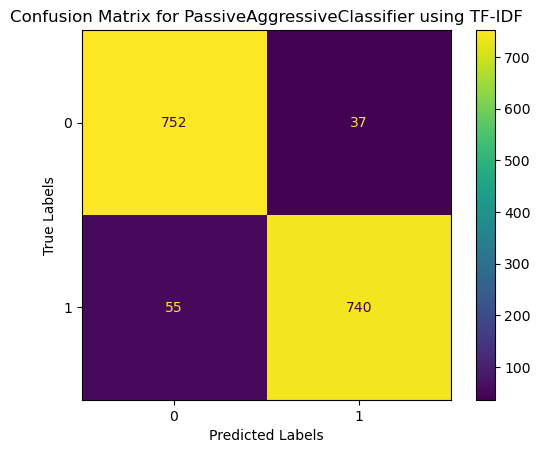

Accuracy of PassiveAggressiveClassifier using TF-IDF and lemmatizing:  0.9419191919191919


In [21]:
Accuracies_of_Models_For_TFIDF = []
PassiveAggressiveClassifier_TFIDF = PassiveAggressiveClassifier(random_state=42)
accuracy_PassiveAggressiveClassifier_TFIDF = train_model(PassiveAggressiveClassifier_TFIDF,
                                                         train_x_After_TFIDF, train_yAfter_TFIDF, valid_x_After_TFIDF,
                                                         valid_yAfter_TFIDF, 'PassiveAggressiveClassifier', 'TF-IDF')
print("Accuracy of PassiveAggressiveClassifier using TF-IDF and lemmatizing: ",
      accuracy_PassiveAggressiveClassifier_TFIDF)
Accuracies_of_Models_For_TFIDF.append(accuracy_PassiveAggressiveClassifier_TFIDF*100)

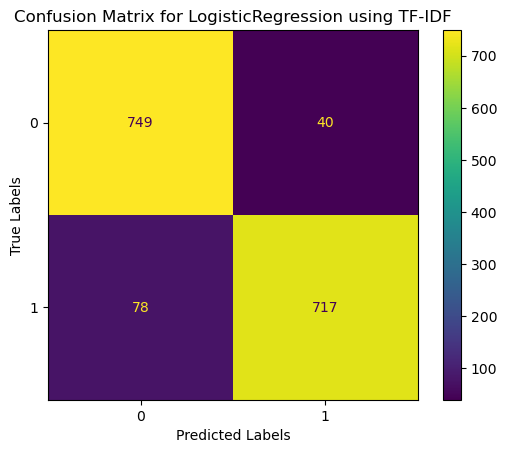

Accuracy of LogisticRegression using TF-IDF and lemmatizing:  0.9255050505050505


In [22]:
LogisticRegression_TFIDF = linear_model.LogisticRegression()
accuracy_LogisticRegression_TFIDF = train_model(LogisticRegression_TFIDF, train_x_After_TFIDF,
                                                train_yAfter_TFIDF, valid_x_After_TFIDF, valid_yAfter_TFIDF,
                                                'LogisticRegression', 'TF-IDF')

print("Accuracy of LogisticRegression using TF-IDF and lemmatizing: ", accuracy_LogisticRegression_TFIDF)
Accuracies_of_Models_For_TFIDF.append(accuracy_LogisticRegression_TFIDF*100)

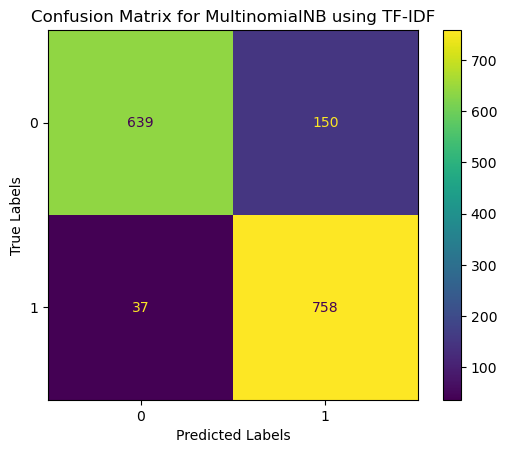

Accuracy of NaiveBayes using TF-IDF and lemmatizing:  0.8819444444444444


In [23]:
MultinomialNB_TFIDF = naive_bayes.MultinomialNB(alpha=0.2)
accuracy_MultinomialNB_TFIDF = train_model(MultinomialNB_TFIDF, train_x_After_TFIDF, train_yAfter_TFIDF
                                           , valid_x_After_TFIDF, valid_yAfter_TFIDF, 'MultinomialNB', 'TF-IDF')
print("Accuracy of NaiveBayes using TF-IDF and lemmatizing: ", accuracy_MultinomialNB_TFIDF)
Accuracies_of_Models_For_TFIDF.append(accuracy_MultinomialNB_TFIDF*100)


# Train Models using Word2Vec

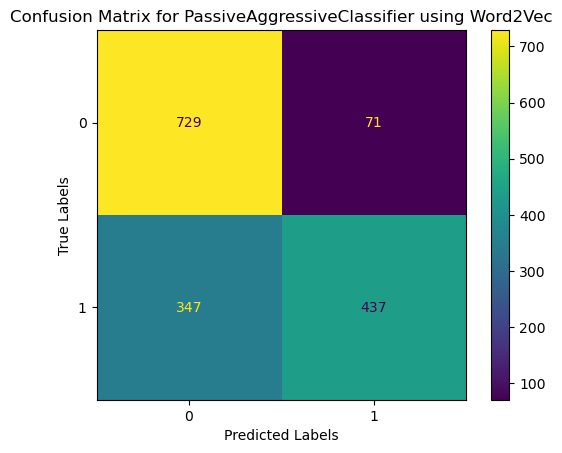

Accuracy of PassiveAggressiveClassifier using Word2Vec and lemmatizing:  0.7361111111111112


In [24]:
Accuracies_of_Models_For_Word2Vec = []
PassiveAggressiveClassifier_Word2Vec = PassiveAggressiveClassifier(random_state=42)
accuracy_PassiveAggressiveClassifier_Word2Vec = train_model(PassiveAggressiveClassifier_Word2Vec,
                                                            train_x_After_Word2Vec, train_yAfter_Word2Vec,
                                                            valid_x_After_Word2Vec, valid_yAfter_Word2Vec,
                                                            'PassiveAggressiveClassifier', 'Word2Vec')
print("Accuracy of PassiveAggressiveClassifier using Word2Vec and lemmatizing: ",
      accuracy_PassiveAggressiveClassifier_Word2Vec)
Accuracies_of_Models_For_Word2Vec.append(accuracy_PassiveAggressiveClassifier_Word2Vec*100)

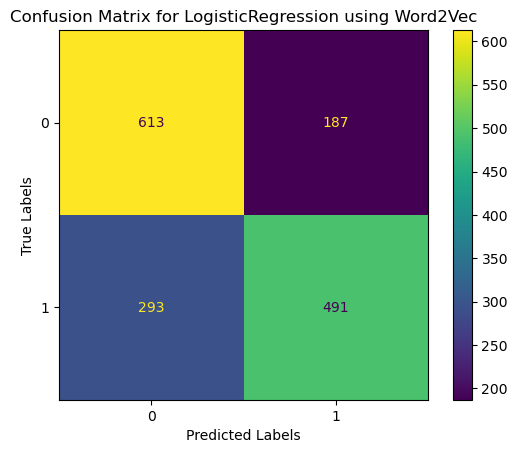

Accuracy of LogisticRegression using Word2Vec and lemmatizing:  0.696969696969697


In [25]:
LogisticRegression_Word2Vec = linear_model.LogisticRegression()
accuracy_LogisticRegression_Word2Vec = train_model(LogisticRegression_Word2Vec, train_x_After_Word2Vec,
                                                   train_yAfter_Word2Vec, valid_x_After_Word2Vec, valid_yAfter_Word2Vec,
                                                   'LogisticRegression', 'Word2Vec')
print("Accuracy of LogisticRegression using Word2Vec and lemmatizing: ", accuracy_LogisticRegression_Word2Vec)
Accuracies_of_Models_For_Word2Vec.append(accuracy_LogisticRegression_Word2Vec*100)


In [26]:
scaler = MinMaxScaler()
train_x_After_Word2Vec_scaled = scaler.fit_transform(train_x_After_Word2Vec)
valid_x_After_Word2Vec_scaled = scaler.transform(valid_x_After_Word2Vec)

#PICKLE LOADING SCALER
with open('scaling.pkl', 'wb')as f:
    pickle.dump(scaler, f)


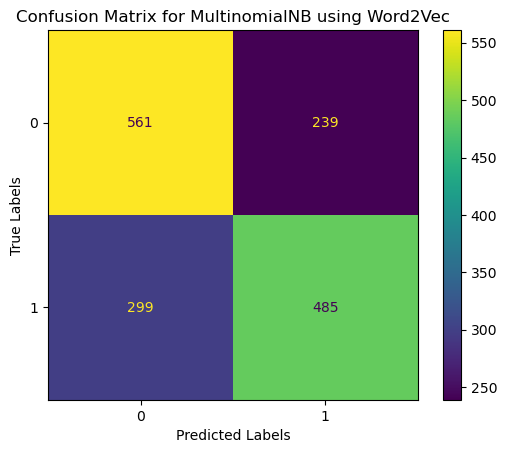

Accuracy of NaiveBayes using Word2Vec and lemmatizing:  0.6603535353535354


In [27]:
MultinomialNB_Word2Vec = naive_bayes.MultinomialNB(alpha=0.2)
accuracy_MultinomialNB_Word2Vec = train_model(MultinomialNB_Word2Vec, train_x_After_Word2Vec_scaled,
                                              train_yAfter_Word2Vec, valid_x_After_Word2Vec_scaled,
                                              valid_yAfter_Word2Vec, 'MultinomialNB', 'Word2Vec')
print("Accuracy of NaiveBayes using Word2Vec and lemmatizing: ", accuracy_MultinomialNB_Word2Vec)
Accuracies_of_Models_For_Word2Vec.append(accuracy_MultinomialNB_Word2Vec*100)

# Train Model using CountVectorizer

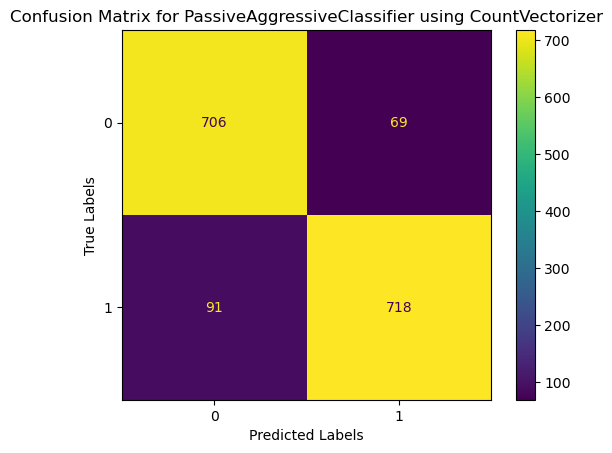

Accuracy of PassiveAggressiveClassifier using CountVectorizer and lemmatizing:  0.898989898989899


In [28]:
Accuracies_of_Models_For_CountVectorizer = []
PassiveAggressiveClassifier_CountVectorizer = PassiveAggressiveClassifier(random_state=42)
accuracy_PassiveAggressiveClassifier_CountVectorizer = train_model(PassiveAggressiveClassifier_CountVectorizer,
                                                                   train_x_After_CountVect, train_yAfter_CountVect,
                                                                   valid_x_After_CountVect, valid_yAfter_CountVect,
                                                                   'PassiveAggressiveClassifier', 'CountVectorizer')
print("Accuracy of PassiveAggressiveClassifier using CountVectorizer and lemmatizing: ",
      accuracy_PassiveAggressiveClassifier_CountVectorizer)
Accuracies_of_Models_For_CountVectorizer.append(accuracy_PassiveAggressiveClassifier_CountVectorizer*100)


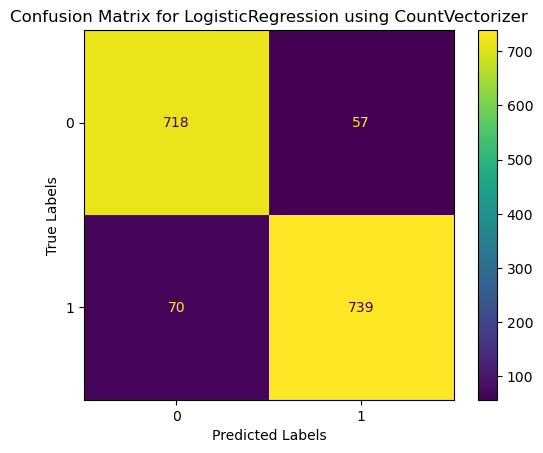

Accuracy of LogisticRegression using CountVectorizer and lemmatizing:  0.9198232323232324


In [29]:
LogisticRegression_CountVectorizer = linear_model.LogisticRegression()
accuracy_LogisticRegression_CountVectorizer = train_model(LogisticRegression_CountVectorizer, train_x_After_CountVect,
                                                          train_yAfter_CountVect,  valid_x_After_CountVect,
                                                          valid_yAfter_CountVect,
                                                          'LogisticRegression', 'CountVectorizer')
print("Accuracy of LogisticRegression using CountVectorizer and lemmatizing: ",
      accuracy_LogisticRegression_CountVectorizer)
Accuracies_of_Models_For_CountVectorizer.append(accuracy_LogisticRegression_CountVectorizer*100)

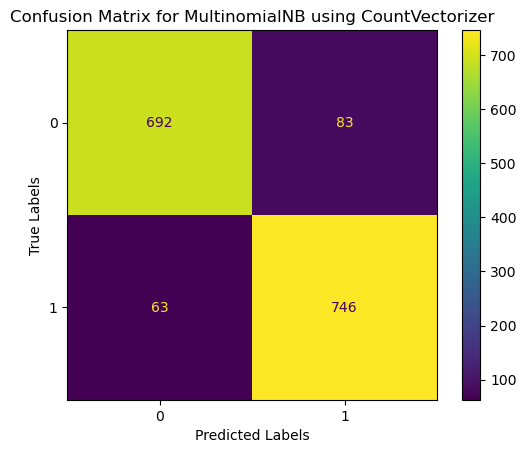

Accuracy of NaiveBayes using CountVectorizer and lemmatizing:  0.9078282828282829


In [30]:
MultinomialNB_CountVectorizer = naive_bayes.MultinomialNB(alpha=0.2)
accuracy_MultinomialNB_CountVectorizer = train_model(MultinomialNB_CountVectorizer, train_x_After_CountVect,
                                                     train_yAfter_CountVect,  valid_x_After_CountVect,
                                                     valid_yAfter_CountVect, 'MultinomialNB', 'CountVectorizer')
print("Accuracy of NaiveBayes using CountVectorizer and lemmatizing: ", accuracy_MultinomialNB_CountVectorizer)
Accuracies_of_Models_For_CountVectorizer.append(accuracy_MultinomialNB_CountVectorizer*100)

In [31]:
#PICKLE LOADING MODELS
with open('selected models.pkl', 'wb')as f:
    pickle.dump(PassiveAggressiveClassifier_TFIDF, f)
    pickle.dump(LogisticRegression_TFIDF, f) 
    pickle.dump(MultinomialNB_TFIDF, f)
    pickle.dump(PassiveAggressiveClassifier_Word2Vec, f)
    pickle.dump(LogisticRegression_Word2Vec, f)
    pickle.dump(MultinomialNB_Word2Vec, f)
    pickle.dump(PassiveAggressiveClassifier_CountVectorizer, f)
    pickle.dump(LogisticRegression_CountVectorizer, f)
    pickle.dump(MultinomialNB_CountVectorizer, f)

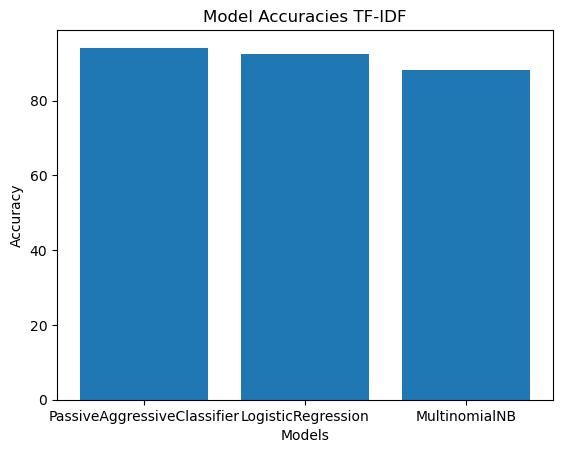

In [32]:
# Plot Accuracies Bar Graph of TF-IDF
plt.bar(Training_Models, Accuracies_of_Models_For_TFIDF)
plt.title('Model Accuracies TF-IDF')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

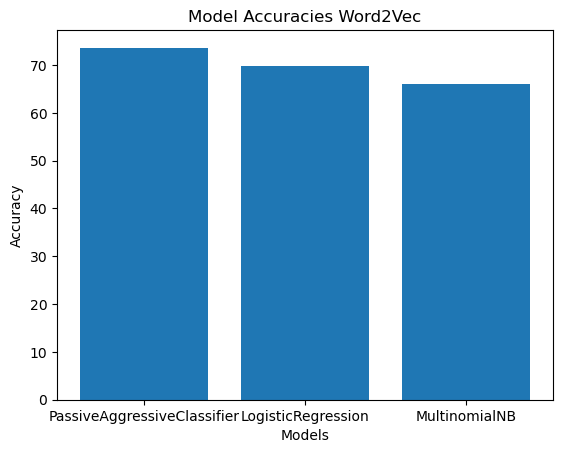

In [33]:
# Plot Accuracies Bar Graph of Word2Vec
plt.bar(Training_Models, Accuracies_of_Models_For_Word2Vec)
plt.title('Model Accuracies Word2Vec')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

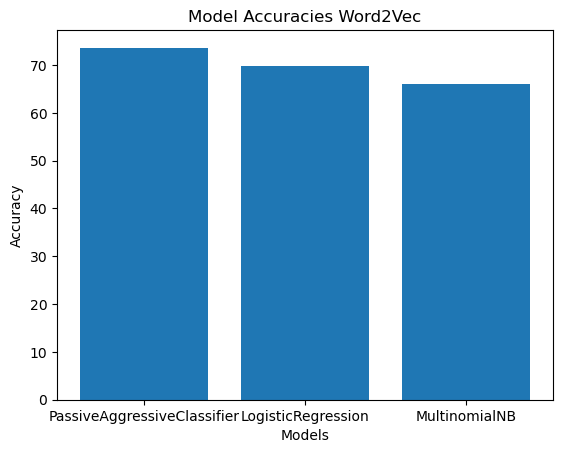

In [34]:
# Plot Accuracies Bar Graph of Word2Vec
plt.bar(Training_Models, Accuracies_of_Models_For_Word2Vec)
plt.title('Model Accuracies Word2Vec')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()